# Fake News Detector - Spanish News Edition

![fake_news](fake_news.jpg)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Welcome" data-toc-modified-id="Welcome-0">Welcome</a></span></li><li><span><a href="#Dataset-description" data-toc-modified-id="Dataset-description-1">Dataset description</a></span></li><li><span><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-2">Importing libraries</a></span></li><li><span><a href="#Loading-the-datasets" data-toc-modified-id="Loading-the-datasets-3">Loading the datasets</a></span></li><li><span><a href="#Understanding-the-dataset" data-toc-modified-id="Understanding-the-dataset-4">Understanding the dataset</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-5">Data cleaning</a></span></li><li><span><a href="#Text-visualization" data-toc-modified-id="Text-visualization-6">Text visualization</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-7">Tokenization</a></span></li><li><span><a href="#Machine-learning-models" data-toc-modified-id="Machine-learning-models-8">Machine learning models</a></span><ul class="toc-item"><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-8.1">Random Forest</a></span></li><li><span><a href="#XGboost" data-toc-modified-id="XGboost-8.2">XGboost</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-8.3">Logistic Regression</a></span></li></ul></li><li><span><a href="#Choosing-the-final-model" data-toc-modified-id="Choosing-the-final-model-9">Choosing the final model</a></span></li><li><span><a href="#Testing-the-final-model" data-toc-modified-id="Testing-the-final-model-10">Testing the final model</a></span></li><li><span><a href="#Saving-the-model" data-toc-modified-id="Saving-the-model-11">Saving the model</a></span></li><li><span><a href="#References" data-toc-modified-id="References-12">References</a></span></li></ul></div>

## Welcome

Hi, welcome to this notebook. 

A year ago, I created my first fake news detector using LSTM thanks to a Coursera Guide Project. It was so interesting, and I had so much fun during the whole project, that I decided to create a second one for Spanish news, experimenting this time with different techniques and ML models. Because we all know that there are different ways to arrive to a destination! 😊


## Dataset description

A fake news detector is nothing more than a binary classification problem, where we use ML models to predict if a news article is either real or fake.

For this project we will use three datasets from Kaggle that you can find in the following link ([Spanish fake news](https://www.kaggle.com/datasets/arseniitretiakov/noticias-falsas-en-espaol?select=onlytrue1000.csv)). Both datasets: 'onlytrue1000' and 'onlyfakes1000' have 1000 rows and one column each. We will use the dataset 'test.csv' to test our model.  


## Importing libraries

In [1]:
# Pandas & numpy:
import numpy as np
import pandas as pd

# Visualization:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

# Text data cleaning:
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer


# Gensim:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

# ML models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# scikit-learn:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pickle
from sklearn.metrics import roc_auc_score




## Loading the datasets

In [2]:
# Loading the onlytrue1000 dataset:

true_df=pd.read_csv("Data/onlytrue1000.csv")
true_df

,text
0,Algunas de las voces extremistas más conocida...
1,Después de casi dos años y medio de luchas po...
2,Dos periodistas birmanos de la agencia Reuter...
3,El Cuerpo Nacional de Policía ha detenido a c...
4,El desfile de la firma en Roma se convierte e...
...,...
995,El Consejo de Gobierno ha dado su visto bueno...
996,Investigadores valencianos han desarrollado u...
997,Los arrestados actuaban en coches y en establ...
998,El Rey ha encargado este miércoles a Pedro Sá...


In [3]:
# Loading the onlyfakes1000 dataset:

fake_df=pd.read_csv("Data/onlyfakes1000.csv")
fake_df

,text
0,El suceso ha tenido lugar en Brasil. Un adole...
1,Estamos en la semana decisiva. Los expertos a...
2,Estudios científicos hay muchos. Unos nos int...
3,Ha sucedido en la ciudad de San José de Río P...
4,La fiesta en Sevilla por el vuelco electoral ...
...,...
995,Reenviado... Me acaban de llegar a casa por co...
996,"JULIO ANGUITA: ""El que debería estar en la cár..."
997,Otegi reclama la salida de prisión de todos lo...
998,Otegi reclama la salida de prisión de todos lo...


Great! We are already familiar with the data. <br>
The next step is to create a new column in both datasets. This new column will be the target feature "fake_new_class". 
This feature will have two values:
<ul>
  <li>0= Real news</li>
  <li>1= Fake news</li>

In [4]:
true_df["fake_new_class"]=0 # fake_new_class in true_df =0. Because all news in this dataset are true. 
fake_df["fake_new_class"]=1 # fake_new_class in fake_df =1. Because all news in this dataset are fake

In [5]:
# Now, we can concat both datasets. As a result, we get the final dataset that we will use in this project. 

df=pd.concat([true_df,fake_df],axis=0).reset_index(drop=True)
df


,text,fake_new_class
0,Algunas de las voces extremistas más conocida...,0
1,Después de casi dos años y medio de luchas po...,0
2,Dos periodistas birmanos de la agencia Reuter...,0
3,El Cuerpo Nacional de Policía ha detenido a c...,0
4,El desfile de la firma en Roma se convierte e...,0
...,...,...
1995,Reenviado... Me acaban de llegar a casa por co...,1
1996,"JULIO ANGUITA: ""El que debería estar en la cár...",1
1997,Otegi reclama la salida de prisión de todos lo...,1
1998,Otegi reclama la salida de prisión de todos lo...,1


## Understanding the dataset

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            2000 non-null   object
 1   fake_new_class  2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


"fake_new_class" should be a categorical feature. Instead, is an integer. 
In the next cell, we will change it to the correct data type.

In [7]:
df.astype({'fake_new_class': 'category'}).dtypes

text                object
fake_new_class    category
dtype: object

In [8]:
# Let's see how it looks the first new from the dataset:

df["text"][0]

' Algunas de las voces extremistas más conocidas de EE.UU., cuentas asociadas con al movimiento de la conocida como alt-right o ligadas a grupos antisemitas o xenófobos , han sido eliminadas de un plumazo de la redes sociales Facebook e Instagram. Se trat'

## Data cleaning 

In [9]:
# Getting the Spanish stop_words: 

stop_words = list(stopwords.words('spanish')) 
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [10]:
# I realized that the stop_words list does not include some important Spanish prepositions such as "según" or "tras".
# I extend the list including these additional terms.

stop_words.extend(['según','tras','cabe','bajo', 'durante', 'mediante', 'so','toda','todas','cada','me','después','despues','segun','solo','sido','estan','lunes','martes','miércoles','jueves','viernes'])

In [11]:
# Funtion for cleaning the dataset:

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [12]:
# Apply the function to the dataframe
df['clean_text'] = df['text'].apply(preprocess)

Let's compare the first row from the dataset before and after the cleaning process. 

In [13]:
# Before cleaning:

df['text'][0]

' Algunas de las voces extremistas más conocidas de EE.UU., cuentas asociadas con al movimiento de la conocida como alt-right o ligadas a grupos antisemitas o xenófobos , han sido eliminadas de un plumazo de la redes sociales Facebook e Instagram. Se trat'

In [14]:
# After:

print(df['clean_text'][0])

['voces', 'extremistas', 'conocidas', 'cuentas', 'asociadas', 'movimiento', 'conocida', 'right', 'ligadas', 'grupos', 'antisemitas', 'xenófobos', 'eliminadas', 'plumazo', 'redes', 'sociales', 'facebook', 'instagram', 'trat']


In [15]:
# join the words into a string
df['clean_joined'] = df['clean_text'].apply(lambda x: " ".join(x))

In [16]:
# Let's see the whole dataset:
df

,text,fake_new_class,clean_text,clean_joined
0,Algunas de las voces extremistas más conocida...,0,"[voces, extremistas, conocidas, cuentas, asoci...",voces extremistas conocidas cuentas asociadas ...
1,Después de casi dos años y medio de luchas po...,0,"[casi, años, medio, luchas, políticas, judicia...",casi años medio luchas políticas judiciales do...
2,Dos periodistas birmanos de la agencia Reuter...,0,"[periodistas, birmanos, agencia, reuters, libe...",periodistas birmanos agencia reuters liberados...
3,El Cuerpo Nacional de Policía ha detenido a c...,0,"[cuerpo, nacional, policía, detenido, cuatro, ...",cuerpo nacional policía detenido cuatro person...
4,El desfile de la firma en Roma se convierte e...,0,"[desfile, firma, roma, convierte, libertad, mu...",desfile firma roma convierte libertad mujeres ...
...,...,...,...,...
1995,Reenviado... Me acaban de llegar a casa por co...,1,"[reenviado, acaban, llegar, casa, correo, pape...",reenviado acaban llegar casa correo papeletas ...
1996,"JULIO ANGUITA: ""El que debería estar en la cár...",1,"[julio, anguita, debería, cárcel, jordi, pujol...",julio anguita debería cárcel jordi pujol corru...
1997,Otegi reclama la salida de prisión de todos lo...,1,"[otegi, reclama, salida, prisión, etarras, apo...",otegi reclama salida prisión etarras apoyar in...
1998,Otegi reclama la salida de prisión de todos lo...,1,"[otegi, reclama, salida, prisión, etarras, apo...",otegi reclama salida prisión etarras apoyar in...


## Text visualization

In order to visualize the data, we will use the library Wordcloud. <br> It allows us to see the 1500 most common words from both real and fake news.

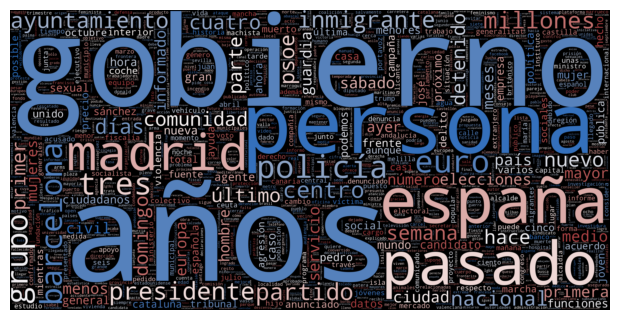

In [17]:
# Wordcloud visualization for the real news

text= " ".join(df[df.fake_new_class == 0].clean_joined)
              
# Generate worldcloud

plt.figure(figsize=(6,6))
              
word_cloud = WordCloud(
        max_words=1500,
        width=3000,
        height=1500,
        random_state=42,
        colormap="vlag",
        collocations=False,
        stopwords= stop_words,
        ).generate(text)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

The most common words for the real news are: 'gobierno', 'España', 'persona' and 'años'.

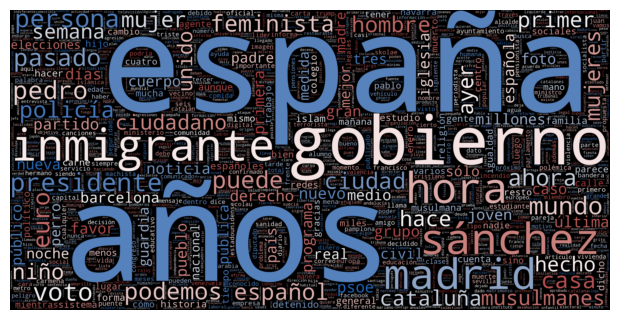

In [18]:
# Wordcloud visualization for the fake news:

text= " ".join(df[df.fake_new_class == 1].clean_joined)
              
# Generate worldcloud

plt.figure(figsize=(6,6))
              
word_cloud = WordCloud(
        max_words=1500,
        width=3000,
        height=1500,
        random_state=42,
        colormap="vlag",
        collocations=False,
        stopwords= stop_words,
        ).generate(text)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

We have some common words in both real and fake news such as: 'España', 'gobierno' and 'años'. However, fake news include very interesting words, for example: 'inmigrante', 'feminista', 'musulmanes', 'podemos' or 'Cataluña'.

## Tokenization

In [19]:
X=df['clean_joined']
y=df['fake_new_class']

In [20]:
# split data into test and train 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In order to tokenize the data we will use CountVectorizer.<br>
It Converts a collection of text documents to a matrix of token counts.

In [21]:
vect = CountVectorizer() 
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(1600, 10667) (400, 10667)


## Machine learning models

In this project we will compare three different models:
<ol>
  <li>Random Forest</li>
  <li>XGboost</li>
  <li>Logistic Regression</li>
</ol>

### Random Forest

In [22]:
model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train_dtm, y_train) # Instead of using X_train we use X_train_dtm
y_pred=model_1.predict(X_test_dtm) # # Instead of using X_test we use X_test_dtm

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.25%


### XGboost

In [24]:
model_2 = XGBClassifier()
model_2.fit(X_train_dtm, y_train)
y_pred_model_2=model_2.predict(X_test_dtm)

In [25]:
accuracy = accuracy_score(y_test, y_pred_model_2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 64.25%


### Logistic Regression

In [26]:
model_3=LogisticRegression()
model_3.fit(X_train_dtm, y_train)
y_pred_model_3=model_3.predict(X_test_dtm)

In [27]:
accuracy = accuracy_score(y_test, y_pred_model_3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.00%


## Choosing the final model

Logistic regression is the model with highest accuracy. It will be our final model. 

In [28]:
print('Classifcation report:\n', classification_report(y_test, y_pred_model_3))

Classifcation report:
               precision    recall  f1-score   support

           0       0.79      0.74      0.76       199
           1       0.76      0.80      0.78       201

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



confusion matrix


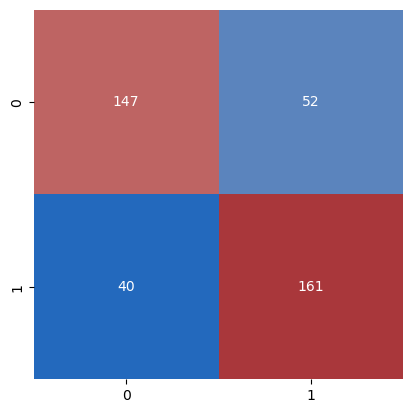

In [29]:
print("confusion matrix")
conf_mat = confusion_matrix(y_test,y_pred_model_3)

sns.heatmap(conf_mat, square=True, annot=True, cmap='vlag', fmt='d', cbar=False)

plt.show()

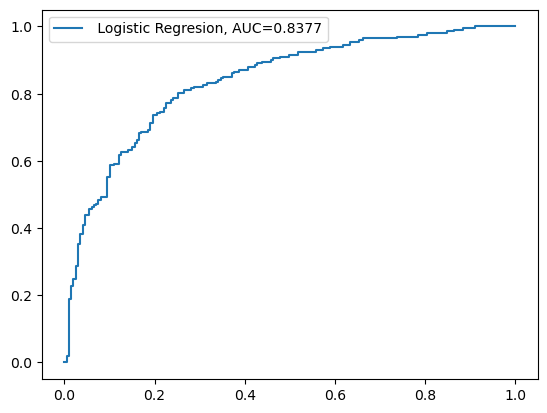

In [30]:
# Roc_auc_score and its visual representation:
y_pred_probs_model_3 = model_3.predict_proba(X_test_dtm)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probs_model_3 )
auc = round(roc_auc_score(y_test,y_pred_probs_model_3), 4)
plt.plot(fpr,tpr,label=" Logistic Regresion, AUC="+str(auc))
plt.legend()

## Testing the final model 
In order to perform the test, we will use the dataset 'test.csv'. 

In [31]:
test_df=pd.read_csv("Data/test.csv")

In [32]:
test_df

,title,text
0,Podemos estudia en su programa playas para muj...,Spanish nationalism rabid that a Catalan compa...
1,Alemania va a quitar los hijos a los padres po...,"Su amante, llamó al marido llorando y le contó..."
2,Valencia multará los balcones con banderas por...,SUBEN LAS PENSIONES 1 EURO Y SUBEN EL RECIBO D...
3,Un directivo de Hazte Oír se besa con una muje...,"Suecia está haciendo un experimento, ha reduci..."
4,Iglesias y Montero se compran también un apart...,Suecia sigue avanzando hacia su islamización. ...
...,...,...
395,"Aumenta un 88,7% el número de autónomos mayore...",El Consejo de Gobierno ha dado su visto bueno...
396,Asesinan a un periodista involucrado en la luc...,Investigadores valencianos han desarrollado u...
397,La fértil cosecha de Porfirio Fisac en el Zara...,Los arrestados actuaban en coches y en establ...
398,Antonio Banderas: Mi novia me salvó la vida co...,El Rey ha encargado este miércoles a Pedro Sá...


In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   246 non-null    object
 1   text    400 non-null    object
dtypes: object(2)
memory usage: 6.4+ KB


In [34]:
# I think that it is interesting to have all text data in the same column. 
# This is why I created the column 'completed_text'.

test_df['completed_text']=test_df['title']+test_df['text']

In [35]:
test_df

,title,text,completed_text
0,Podemos estudia en su programa playas para muj...,Spanish nationalism rabid that a Catalan compa...,Podemos estudia en su programa playas para muj...
1,Alemania va a quitar los hijos a los padres po...,"Su amante, llamó al marido llorando y le contó...",Alemania va a quitar los hijos a los padres po...
2,Valencia multará los balcones con banderas por...,SUBEN LAS PENSIONES 1 EURO Y SUBEN EL RECIBO D...,Valencia multará los balcones con banderas por...
3,Un directivo de Hazte Oír se besa con una muje...,"Suecia está haciendo un experimento, ha reduci...",Un directivo de Hazte Oír se besa con una muje...
4,Iglesias y Montero se compran también un apart...,Suecia sigue avanzando hacia su islamización. ...,Iglesias y Montero se compran también un apart...
...,...,...,...
395,"Aumenta un 88,7% el número de autónomos mayore...",El Consejo de Gobierno ha dado su visto bueno...,"Aumenta un 88,7% el número de autónomos mayore..."
396,Asesinan a un periodista involucrado en la luc...,Investigadores valencianos han desarrollado u...,Asesinan a un periodista involucrado en la luc...
397,La fértil cosecha de Porfirio Fisac en el Zara...,Los arrestados actuaban en coches y en establ...,La fértil cosecha de Porfirio Fisac en el Zara...
398,Antonio Banderas: Mi novia me salvó la vida co...,El Rey ha encargado este miércoles a Pedro Sá...,Antonio Banderas: Mi novia me salvó la vida co...


In [36]:
# dropping the missing values:

test_df.dropna(subset = ["completed_text"], inplace=True)

In [37]:
# using the cleaning function in 'completed_text':

test_df['clean_text']=test_df['completed_text'].apply(preprocess)

In [38]:
test_df['clean_text_joined'] = test_df['clean_text'].apply(lambda x: " ".join(x))

In [39]:
test_df

,title,text,completed_text,clean_text,clean_text_joined
0,Podemos estudia en su programa playas para muj...,Spanish nationalism rabid that a Catalan compa...,Podemos estudia en su programa playas para muj...,"[podemos, estudia, programa, playas, mujeres, ...",podemos estudia programa playas mujeres nation...
1,Alemania va a quitar los hijos a los padres po...,"Su amante, llamó al marido llorando y le contó...",Alemania va a quitar los hijos a los padres po...,"[alemania, quitar, hijos, padres, publicacione...",alemania quitar hijos padres publicaciones con...
2,Valencia multará los balcones con banderas por...,SUBEN LAS PENSIONES 1 EURO Y SUBEN EL RECIBO D...,Valencia multará los balcones con banderas por...,"[valencia, multará, balcones, banderas, verlas...",valencia multará balcones banderas verlas ropa...
3,Un directivo de Hazte Oír se besa con una muje...,"Suecia está haciendo un experimento, ha reduci...",Un directivo de Hazte Oír se besa con una muje...,"[directivo, hazte, besa, mujer, benidorm, sabe...",directivo hazte besa mujer benidorm saber haci...
4,Iglesias y Montero se compran también un apart...,Suecia sigue avanzando hacia su islamización. ...,Iglesias y Montero se compran también un apart...,"[iglesias, montero, compran, apartamento, beni...",iglesias montero compran apartamento benidorms...
...,...,...,...,...,...
395,"Aumenta un 88,7% el número de autónomos mayore...",El Consejo de Gobierno ha dado su visto bueno...,"Aumenta un 88,7% el número de autónomos mayore...","[aumenta, número, autónomos, mayores, años, co...",aumenta número autónomos mayores años consejo ...
396,Asesinan a un periodista involucrado en la luc...,Investigadores valencianos han desarrollado u...,Asesinan a un periodista involucrado en la luc...,"[asesinan, periodista, involucrado, lucha, ébo...",asesinan periodista involucrado lucha ébola co...
397,La fértil cosecha de Porfirio Fisac en el Zara...,Los arrestados actuaban en coches y en establ...,La fértil cosecha de Porfirio Fisac en el Zara...,"[fértil, cosecha, porfirio, fisac, zaragoza, a...",fértil cosecha porfirio fisac zaragoza arresta...
398,Antonio Banderas: Mi novia me salvó la vida co...,El Rey ha encargado este miércoles a Pedro Sá...,Antonio Banderas: Mi novia me salvó la vida co...,"[antonio, banderas, novia, salvó, vida, aspiri...",antonio banderas novia salvó vida aspirina enc...


In [40]:
test_dtm = vect.transform(test_df["clean_text_joined"])

In [41]:
# Now, we can make some predictions:

y_pred_test = model_3.predict(test_dtm)

In [42]:
test_df['fake_new_class'] = pd.Series(y_pred_test).map({0:"Real", 1:"Fake"}) # True 1, Falsa 0

In [43]:
test_df["fake_new_class"].value_counts()

Real    85
Fake    33
Name: fake_new_class, dtype: int64

According to our predictions, there are 85 real and 33 fake news in test_df

In [44]:
# Let's see the five first fake news from test_df:

test_df[test_df["fake_new_class"] == "Fake"][:5]

,title,text,completed_text,clean_text,clean_text_joined,fake_new_class
0,Podemos estudia en su programa playas para muj...,Spanish nationalism rabid that a Catalan compa...,Podemos estudia en su programa playas para muj...,"[podemos, estudia, programa, playas, mujeres, ...",podemos estudia programa playas mujeres nation...,Fake
1,Alemania va a quitar los hijos a los padres po...,"Su amante, llamó al marido llorando y le contó...",Alemania va a quitar los hijos a los padres po...,"[alemania, quitar, hijos, padres, publicacione...",alemania quitar hijos padres publicaciones con...,Fake
2,Valencia multará los balcones con banderas por...,SUBEN LAS PENSIONES 1 EURO Y SUBEN EL RECIBO D...,Valencia multará los balcones con banderas por...,"[valencia, multará, balcones, banderas, verlas...",valencia multará balcones banderas verlas ropa...,Fake
3,Un directivo de Hazte Oír se besa con una muje...,"Suecia está haciendo un experimento, ha reduci...",Un directivo de Hazte Oír se besa con una muje...,"[directivo, hazte, besa, mujer, benidorm, sabe...",directivo hazte besa mujer benidorm saber haci...,Fake
4,Iglesias y Montero se compran también un apart...,Suecia sigue avanzando hacia su islamización. ...,Iglesias y Montero se compran también un apart...,"[iglesias, montero, compran, apartamento, beni...",iglesias montero compran apartamento benidorms...,Fake


In [45]:
# Now it is turn to see the five first real news from test_df:

test_df[test_df["fake_new_class"] == "Real"][:5]

,title,text,completed_text,clean_text,clean_text_joined,fake_new_class
61,Los Diputados deberán devolver el sueldo de lo...,Un taxista marroquí apunyalada un taxista paki...,Los Diputados deberán devolver el sueldo de lo...,"[diputados, deberán, devolver, sueldo, últimos...",diputados deberán devolver sueldo últimos mese...,Real
67,630 MILLONES DESTINADOS A AYUDAS AL DESARROLLO...,Una de las últimas peticiones de la comunidad ...,630 MILLONES DESTINADOS A AYUDAS AL DESARROLLO...,"[millones, destinados, ayudas, desarrollo, par...",millones destinados ayudas desarrollo parar or...,Real
72,SUCESOSDos ladrones dejan inconsciente a un jo...,Una grabación de seguridad ha captado el momen...,SUCESOSDos ladrones dejan inconsciente a un jo...,"[sucesosdos, ladrones, dejan, inconsciente, jo...",sucesosdos ladrones dejan inconsciente joven z...,Real
73,(VÍDEO): Un magrebí ataca a una chica en Bilba...,"Una increíble historia ocurrió en Mississippi,...",(VÍDEO): Un magrebí ataca a una chica en Bilba...,"[vídeo, magrebí, ataca, chica, bilbao, erzaint...",vídeo magrebí ataca chica bilbao erzaintza imp...,Real
74,(ÚLTIMA HORA): Un marroquí arroja dos personas...,Una madre ha denunciado ante el Defensor del P...,(ÚLTIMA HORA): Un marroquí arroja dos personas...,"[última, hora, marroquí, arroja, personas, vía...",última hora marroquí arroja personas vías tren...,Real


## Saving the model

In [46]:
pickle.dump(model_3, open('model.pkl', 'wb'))

In [47]:
pickle.dump(vect, open('vectorize.pkl', 'wb'))

## References

- [Fake new detector with ML](https://www.coursera.org/projects/nlp-fake-news-detector?action=enroll).
- [Creando un detector de Fake News desde 0](https://robertoesteves.com/creando-un-detector-de-fake-news-desde-0-8179e007206e).  Write article in Medium by Roberto Esteves. 
- [CounVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).
